In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df= pd.read_csv('./data_tf/data_concat.csv')

In [32]:
df.shape

(314, 47)

In [33]:
corr = df.corr()

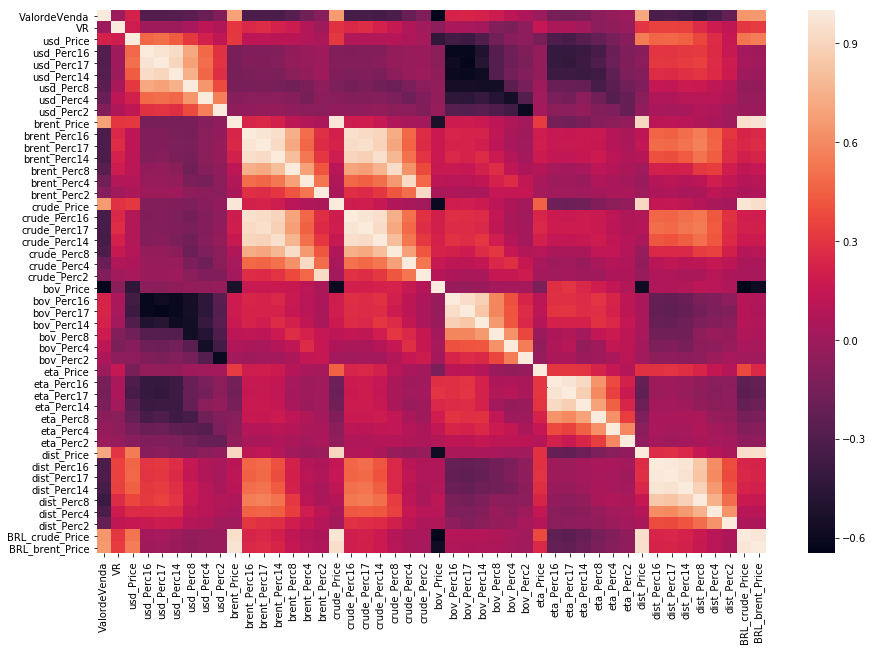

In [34]:
plt.figure(figsize=[15,10])
sns.heatmap(corr)

In [35]:
df["VR"].value_counts()

0.0    144
1.0    137
2.0     33
Name: VR, dtype: int64

In [36]:
df.shape[0]

314

In [43]:
train_size = 0.75

df_train = df.iloc[0:int(df.shape[0]*train_size)]
df_teste = df.iloc[int(df.shape[0]*train_size):]

In [44]:
df_train.shape[0]+df_teste.shape[0]

314

In [45]:
df_train.tail()

DatadaColeta  ValordeVenda   VR  usd_Price  usd_Perc16  usd_Perc17  \
230   2019-02-18      4.129000  1.0     3.7353    2.065743    2.065743   
231   2019-02-19      4.129000  1.0     3.7231    1.482814    1.732382   
232   2019-02-20      3.943872  1.0     3.7277    1.577743    1.608199   
233   2019-02-21      3.943872  1.0     3.7696    1.927913    2.719494   
234   2019-02-22      3.943872  1.0     3.7485    0.855598    1.357380   

     usd_Perc14  usd_Perc8  usd_Perc4  usd_Perc2  ...  eta_Perc2  dist_Price  \
230    1.784838  -0.596109   0.932231   0.932231  ...   0.000000      1.6890   
231    0.670578   0.358510   0.602572  -0.326614  ...  -1.128668      1.7279   
232    0.295961  -0.711166   0.726870   0.123553  ...   0.989346      1.7646   
233    1.083342   1.243521   0.918266   1.124017  ...   1.281085      1.7847   
234    0.517537   1.288911   0.682227  -0.559741  ...   0.148810      1.7847   

     dist_Perc16  dist_Perc17  dist_Perc14  dist_Perc8  dist_Perc4  \
230     5.155026     5.155026     3.657788    3.094676    0.000000   
231     7.576893     7.576893     5.469089    4.461646    2.303139   
232     8.297534     9.861789     7.709217    6.680376    4.476023   
233     8.936098     9.531117     8.936098    7.895538    5.666076   
234     8.936098     8.936098     8.936098    5.666076    3.287228   

     dist_Perc2  BRL_crude_Price  BRL_brent_Price  
230    0.000000       210.185331       248.397450  
231    2.303139       208.828679       247.399995  
232    2.123966       212.180684       250.054116  
233    1.139068       214.716416       252.827072  
234    0.000000       214.639110       251.599320  

[5 rows x 47 columns]

In [46]:
df_teste.head()

DatadaColeta  ValordeVenda   VR  usd_Price  usd_Perc16  usd_Perc17  \
235   2019-02-23      3.943872  1.0     3.7485    0.517537    0.855598   
236   2019-02-24      3.943872  1.0     3.7476    0.493403    0.493403   
237   2019-02-25      3.943872  1.0     3.7521    0.533198    0.614073   
238   2019-02-26      4.158830  1.0     3.7489   -0.234186    0.447457   
239   2019-02-27      4.158830  1.0     3.7287    0.509461   -0.771749   

     usd_Perc14  usd_Perc8  usd_Perc4  usd_Perc2  ...  eta_Perc2  dist_Price  \
235    0.436740   1.288911   0.557985   0.000000  ...   0.000000      1.7847   
236   -0.268781   1.264591  -0.583616  -0.024010  ...   0.000000      1.7847   
237    1.140223   0.449763   0.096038   0.120077  ...  -0.445765      1.7847   
238   -0.146495   0.692971   0.010671  -0.085286  ...  -0.223881      1.7847   
239    0.145033   0.026826  -0.504323  -0.538825  ...   0.149589      1.7847   

     dist_Perc16  dist_Perc17  dist_Perc14  dist_Perc8  dist_Perc4  \
235     8.936098     8.936098     8.936098    5.666076    1.139068   
236     8.936098     8.936098     8.936098    5.666076    0.000000   
237     8.936098     8.936098     7.895538    5.666076    0.000000   
238     8.936098     8.936098     7.895538    3.287228    0.000000   
239     7.895538     8.936098     7.895538    1.139068    0.000000   

     dist_Perc2  BRL_crude_Price  BRL_brent_Price  
235         0.0       214.639110       251.599320  
236         0.0       214.587576       251.538912  
237         0.0       208.166508       242.985996  
238         0.0       208.063950       244.465769  
239         0.0       212.312178       247.548393  

[5 rows x 47 columns]

In [47]:
df_teste["VR"].value_counts()

1.0    57
0.0    18
2.0     4
Name: VR, dtype: int64

In [48]:
df_train["VR"].value_counts()

0.0    126
1.0     80
2.0     29
Name: VR, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

### Random Forest Classifier

In [50]:
rfc = RandomForestClassifier(n_estimators=30)

In [51]:
rfc.fit(df_train.drop(["DatadaColeta","VR"],axis=1),df_train["VR"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
preds = rfc.predict(df_teste.drop(["DatadaColeta","VR"],axis=1))

In [53]:
confusion_matrix(df_teste["VR"], preds)

array([[ 5, 13,  0],
       [10, 47,  0],
       [ 0,  4,  0]])

In [54]:
rfc.feature_importances_

array([0.0478016 , 0.01578734, 0.0227166 , 0.03367427, 0.01731844,
       0.00968775, 0.0038306 , 0.00937079, 0.03129452, 0.03233897,
       0.04451196, 0.01786447, 0.02768184, 0.00814298, 0.00653347,
       0.02760145, 0.03308571, 0.02358179, 0.03069436, 0.09056586,
       0.01154273, 0.009254  , 0.01879223, 0.01717726, 0.02758673,
       0.01152022, 0.01398267, 0.0058998 , 0.00540865, 0.01230196,
       0.01602289, 0.01338616, 0.02309163, 0.02451645, 0.01474643,
       0.00765438, 0.04275963, 0.01382649, 0.04645489, 0.028111  ,
       0.02147677, 0.00870813, 0.01242624, 0.02052776, 0.0387401 ])

In [55]:
r2_score(df_teste["VR"].values,preds)

-0.38326848249027234

## GBT Classifier

In [56]:
gbc = GradientBoostingClassifier(n_estimators=30)
gbc.fit(df_train.drop(["DatadaColeta","VR"],axis=1),df_train["VR"])
preds = gbc.predict(df_teste.drop(["DatadaColeta","VR"],axis=1))

In [57]:
confusion_matrix(df_teste["VR"], preds)

array([[ 8, 10,  0],
       [20, 36,  1],
       [ 0,  4,  0]])

In [58]:
r2_score(df_teste["VR"].values,preds)

-0.7931258106355381

In [59]:
rfr = RandomForestRegressor(n_estimators=60,max_features=0.7)

In [60]:
rfr.fit(df_train.drop(["DatadaColeta","VR","ValordeVenda"],axis=1),df_train["ValordeVenda"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
preds = rfr.predict(df_teste.drop(["DatadaColeta","VR","ValordeVenda"],axis=1))

In [62]:
preds

array([4.03342272, 4.04786137, 4.06923507, 4.0636046 , 4.06206363,
       4.17180861, 4.36634512, 4.38476336, 4.3986126 , 4.3484656 ,
       4.39151668, 4.36895374, 4.39168382, 4.4009658 , 4.37514096,
       4.34626214, 4.3895452 , 4.40771373, 4.46427805, 4.40737417,
       4.43168916, 4.43389289, 4.43539524, 4.40767257, 4.41270822,
       4.42199393, 4.39574859, 4.41942142, 4.42907627, 4.42209036,
       4.40951355, 4.41236067, 4.54055355, 4.44218069, 4.4776531 ,
       4.46703825, 4.43949772, 4.51374231, 4.52563974, 4.49512847,
       4.55499692, 4.52263834, 4.54280087, 4.56935151, 4.56469264,
       4.58712383, 4.56616078, 4.55860983, 4.63929108, 4.638899  ,
       4.63509778, 4.62540327, 4.59771517, 4.62528816, 4.5752536 ,
       4.59298204, 4.59334198, 4.58150668, 4.57634445, 4.57220712,
       4.44627339, 4.49856069, 4.56076577, 4.57822705, 4.55656044,
       4.60180322, 4.60216341, 4.61168394, 4.58914652, 4.58851938,
       4.59400747, 4.59001579, 4.59033707, 4.58632303, 4.59030

In [63]:
df_teste["ValordeVenda"].values

array([3.94387234, 3.94387234, 3.94387234, 4.15882979, 4.15882979,
       4.15882979, 4.15882979, 4.15882979, 4.15882979, 4.15882979,
       4.21175   , 4.21175   , 4.21175   , 4.11162791, 4.11162791,
       4.11162791, 4.11162791, 4.399     , 4.30536957, 4.30536957,
       4.30536957, 4.30536957, 4.30536957, 4.30536957, 4.229     ,
       4.26795455, 4.199     , 4.199     , 4.199     , 4.199     ,
       4.31261702, 4.31261702, 4.31261702, 4.31261702, 4.31261702,
       4.31261702, 4.31261702, 4.38122222, 4.34344737, 4.34344737,
       4.34344737, 4.34344737, 4.34344737, 4.34344737, 4.34344737,
       4.34344737, 4.464     , 4.36466667, 4.36466667, 4.36466667,
       4.36466667, 4.36466667, 4.36466667, 4.32289362, 4.32289362,
       4.32289362, 4.32289362, 4.32289362, 4.32289362, 4.32289362,
       4.32289362, 4.39780851, 4.39780851, 4.39780851, 4.39780851,
       4.43144681, 4.43144681, 4.43144681, 4.43144681, 4.43144681,
       4.43144681, 4.43144681, 4.43144681, 4.466     , 4.50425

In [64]:
r2_score(df_teste["ValordeVenda"].values,preds)

-1.186827172899977